<a href="https://colab.research.google.com/github/LinarKulinar/VortexBeamResearch/blob/main/forming_vortex_beam_master_research_2022_forming_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Вихревые оптические пучки**
## **НИР Ахметов Линар 6133 2 семестр магистратуры**
### Тема НИР: Распознавание мультиплексированных вихревых пучков с использованием нейронных сетей



### **Описание ноутбука и полученные выводы**

Реализован код, создающий датасет из пучков (являющихся суперпозицией двух пучков с угловыми орбитальными моментами разных знаков из диапазона [-5,-1] и [1,5] соответственно) (в качестве метки использовался модуль разности двух угловых орбитальных моментов)

Полученные 30 изображений пучков были подвергнуты аугментации сдвигом и вращением, что дало нам 33750 различных изображений принадлежащих различным 10 классам.

Полученыые 33750 изображений были скормлены нейронной сети на tensorflow с двумя Dense слоями.

На обучающей и тестовой выборке была достигнута accuracy в 0.93

Визуализированы результаты предсказаний.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math

import cv2

import os, sys

#### Распарсим метки изображений из файла в ассоциативный массив `label_dict`

In [2]:
map_name_file = 'map.txt'
label_dict = {}   

dir_name = 'Double-OV-intenisities'
folders = os.listdir(dir_name)


for i, folder in enumerate(folders):
    print(f'Открываем папку {folder}')
    file1 = open(f'{dir_name}/{folder}/{map_name_file}', 'r')

    while True:

        # Получаем строчка за строчкой
        line = file1.readline()

        # Если строка пуста или конец файла
        if not line:
            break
        line_splitted = line.split(' ')
        num_image = int(line_splitted[0][:-1])
        a = int(line_splitted[1][:-1])
        if line_splitted[2][-1]=='\n': # в последней строке нет символа \n, обрабатываем этот случай
            b = int(line_splitted[2][:-1])
        else:
            b = int(line_splitted[2])
        if label_dict.get(num_image)!=None:
            print("Ошибка! Словарь уже имеет значение такое в себе")
        label_dict[num_image] = (a, b)
        #print(f'num_image={num_image} a={a} b={b}')

    file1.close()

Открываем папку 1-914
Открываем папку 1833-2745
Открываем папку 2747-3660
Открываем папку 918-1830


#### Распарсим изображения из файла в переменную `imgs`

In [3]:
def resize_and_cut_to_square(image: np.array, width: int):
    """
    Обрезает  изображение image до квадрата и выдает картику размерностью (width, width) пикселей.
    """
    assert len(image.shape) == 3
    assert type(width) == int
    delta = image.shape[1] // 2 - image.shape[0] // 2
    image_after_cutting = image[:, delta:-delta, :]
    image_result = cv2.resize(image_after_cutting, (width, width))
    return image_result
    
# Тесты функции:
# im_tmp1 = cv2.imread(f'Double-OV-intenisities/1-914/9.jpg')
# im_tmp5 = resize_and_cut_to_square(im_tmp1, 120)
# print(im_tmp5.shape)
# plt.imshow(im_tmp5)

In [21]:
dir_name = 'Double-OV-intenisities'
folders = os.listdir(dir_name)
    

imgs2 = []
labels_beam2 = []
for i, folder in enumerate(folders):
    print(f'Открываем папку {folder}')
    pictures = os.listdir(f'{dir_name}/{folder}')
    pictures.remove(map_name_file)
    for k in range(len(pictures)//10):
        im_tmp = cv2.imread(f'{dir_name}/{folder}/{pictures[k]}')
        im = cv2.resize(im_tmp, (160, 120))
        num_pictures = int(pictures[k][:-4]) # Получение номер картинки из названия. Отрезаем '.jpg' в конце строки
        if num_pictures != 0 : # Нет информации о том, что в этой картике закодировано
            imgs2.append(im)
            labels_beam2.append(label_dict[num_pictures])
    #break
imgs2 = np.array(imgs2)

Открываем папку 1-914
Открываем папку 1833-2745
Открываем папку 2747-3660
Открываем папку 918-1830


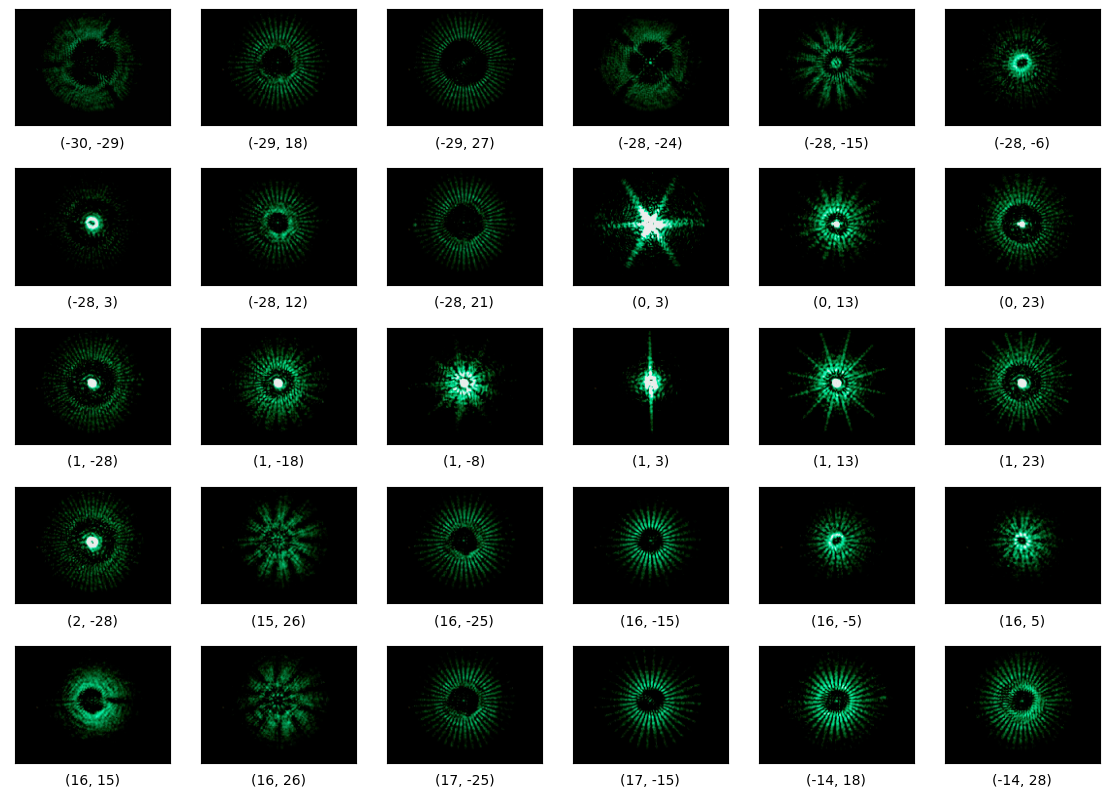

In [26]:
plt.figure(figsize=(14,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs2[10*i], cmap=plt.cm.hot)
    plt.xlabel(labels_beam2[10*i])


In [4]:
dir_name = 'Double-OV-intenisities'
folders = os.listdir(dir_name)
    

imgs = []
labels_beam = []
for i, folder in enumerate(folders):
    print(f'Открываем папку {folder}')
    pictures = os.listdir(f'{dir_name}/{folder}')
    pictures.remove(map_name_file)
    for k in range(len(pictures)):
        im_tmp = cv2.imread(f'{dir_name}/{folder}/{pictures[k]}')
        im = resize_and_cut_to_square(im_tmp, 120) # обрезаем до квадрата и размера 120x120 пикселей
        
        num_pictures = int(pictures[k][:-4]) # Получение номер картинки из названия. Отрезаем '.jpg' в конце строки
        if num_pictures != 0 : # Нет информации о том, что в этой картике закодировано
            imgs.append(im)
            labels_beam.append(label_dict[num_pictures])
    #break
imgs = np.array(imgs)

Открываем папку 1-914
Открываем папку 1833-2745
Открываем папку 2747-3660
Открываем папку 918-1830


In [5]:
label_dict[1]

(-30, -29)

In [6]:
# Оставленный код хорошего человека:)
# label_dict[0]kfjksfsfjflkf;fkllf/.g";f'wat'wltdv,./kf;lsfipegt;aerlg;f;sdkbklfbs.d.h;/lthddfjklsfjslfvjslvgjlkvjkldfvjkzjgklzjkljkgjkgjkgjkldgjklgjsklgjszklgjkzdkglksdkfskldzgk\;

In [7]:
labels_beam[0]

(-30, -29)

In [8]:
imgs.shape

(3653, 120, 120, 3)

In [9]:
labels_list = [abs(one_label[0]-one_label[1]) for one_label in labels_beam]
labels = np.array(labels_list)

In [10]:
for i in set(labels_list):
    print(i,"\t", labels_list.count(i))


1 	 116
2 	 115
3 	 116
4 	 114
5 	 112
6 	 110
7 	 108
8 	 106
9 	 104
10 	 102
11 	 100
12 	 98
13 	 96
14 	 94
15 	 92
16 	 90
17 	 88
18 	 86
19 	 84
20 	 82
21 	 80
22 	 78
23 	 76
24 	 74
25 	 72
26 	 70
27 	 68
28 	 66
29 	 64
30 	 62
31 	 60
32 	 58
33 	 56
34 	 54
35 	 52
36 	 50
37 	 48
38 	 46
39 	 44
40 	 42
41 	 40
42 	 38
43 	 36
44 	 34
45 	 32
46 	 30
47 	 28
48 	 26
49 	 24
50 	 22
51 	 20
52 	 18
53 	 16
54 	 14
55 	 12
56 	 10
57 	 8
58 	 6
59 	 4
60 	 2


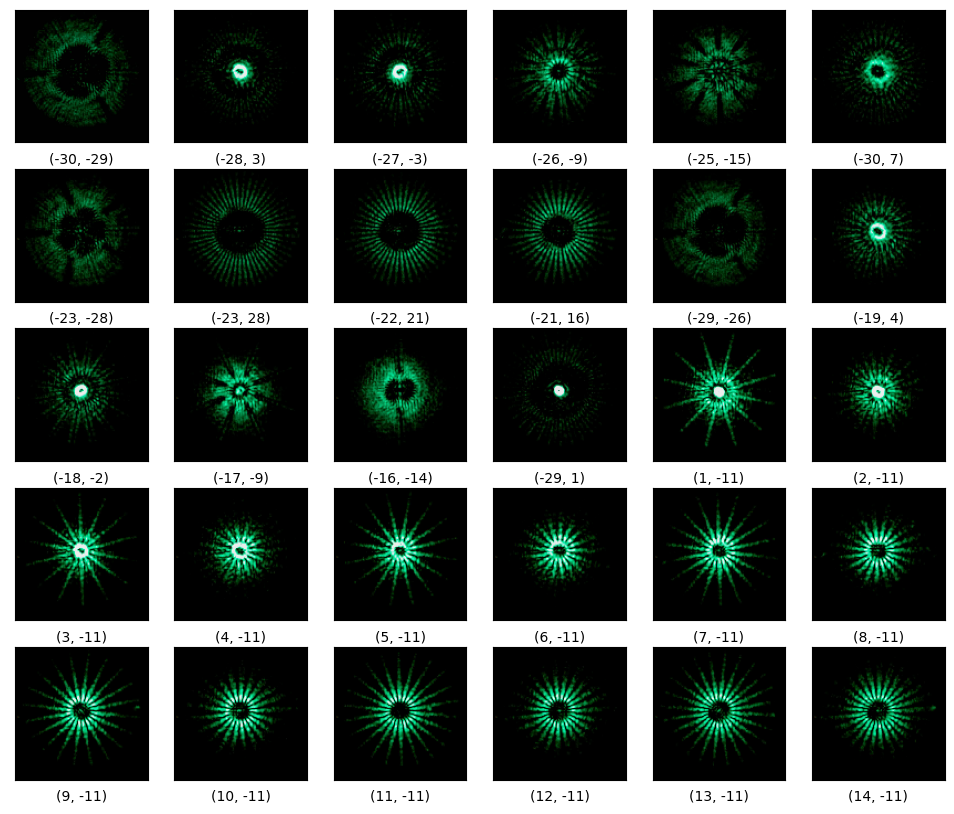

In [12]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[60*i], cmap=plt.cm.hot)
    plt.xlabel(labels_beam[60*i])


### Уберем из датасета классы, у которых меньше 60 различных изображений.

In [11]:
# Положим в список need_labels классы, у которых меньше trashhold_num_classes изображений
trashhold_num_classes = 60
need_labels = []
for i in set(labels_list):
    count = labels_list.count(i)
    if count > trashhold_num_classes:
        print(i,"\t", labels_list.count(i))
        need_labels.append(i)

1 	 116
2 	 115
3 	 116
4 	 114
5 	 112
6 	 110
7 	 108
8 	 106
9 	 104
10 	 102
11 	 100
12 	 98
13 	 96
14 	 94
15 	 92
16 	 90
17 	 88
18 	 86
19 	 84
20 	 82
21 	 80
22 	 78
23 	 76
24 	 74
25 	 72
26 	 70
27 	 68
28 	 66
29 	 64
30 	 62


Выведем число классов, которые оставим в датасете

In [12]:
len(need_labels)

30

In [13]:
mask_ge_60 = []
for label in labels:
    mask_ge_60.append(label in need_labels)

imgs_label_ge_60 = imgs[mask_ge_60]
labels_beam_ge_60 = np.array(labels_beam)[mask_ge_60]

In [14]:
imgs_label_ge_60.shape

(2723, 120, 120, 3)

In [15]:
labels_beam_ge_60.shape

(2723, 2)

In [16]:
# Вычислим дельту орбитального углового момента пучков в суперпозиции для результирующего датасета
labels_delta_ge_60 = []
for l in labels_beam_ge_60:
    labels_delta_ge_60.append(abs(l[0]-l[1]))
labels_delta_ge_60 = np.array(labels_delta_ge_60)

Получили 2723 цветных изображения из 30 классов с разрешением 120 на 120 пикселей

Они записаны в трех переменных: 

`imgs_label_ge_60` - сами изображения

`labels_beam_ge_60` - два числа - значения углового орбитально момента

`labels_delta_ge_60` - одно число - значение модуля разности угловых моментов

##### Выведем все графики с одним значением `abs(a-b)`

C:\Users\Kulinar\.conda\envs\dl_2022\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


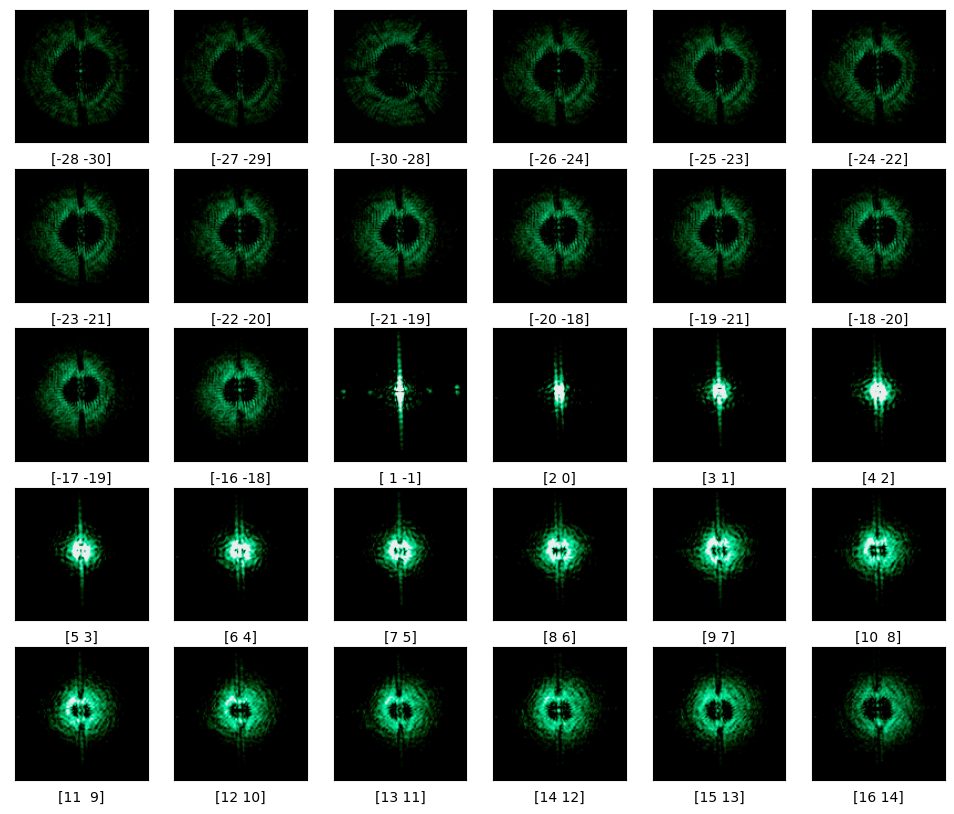

In [17]:
interesting_value = 2
imgs_label_ge_60_tmp = imgs_label_ge_60[labels_delta_ge_60 == interesting_value]
labels_beam_ge_60_tmp = np.array(labels_beam_ge_60)[labels_delta_ge_60 == interesting_value]

plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs_label_ge_60_tmp[2*i], cmap=plt.cm.hot)
    plt.xlabel(labels_beam_ge_60_tmp[2*i])


#### Todo: сделать аугментацию

### Предобрабатываем данные

Нормализовываем каждое изображение (чтобы значение пикселя было в диапазоне [0, 1]):

In [18]:
# Перезапишем в обоащенно названные переменные
images_new_raw = imgs_label_ge_60
labels_new = labels_delta_ge_60
images_new_raw.shape

(2723, 120, 120, 3)

In [19]:
np.max(images_new_raw[0])

137

Todo: проверить, как обучается лучше модель если нормализовывать картинки делением на 255 или максимум по картинке

In [21]:
images_new = np.zeros(shape = images_new_raw.shape)
for index, one_image in enumerate(images_new_raw):
    images_new[index] = one_image / np.max(one_image)

Нормализовываем делением на 255
Нормализовываем делением на максимум по картинке


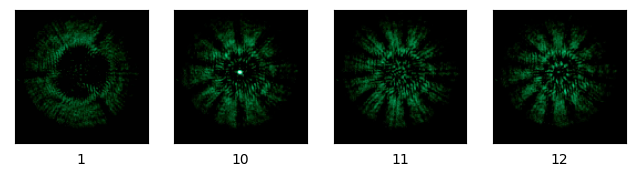

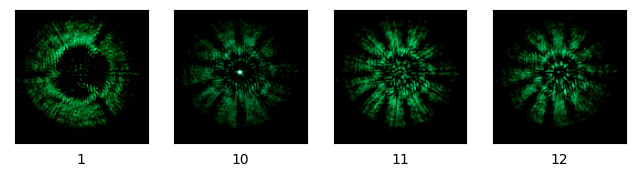

In [22]:

print("Нормализовываем делением на 255")
plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_new_raw[i], cmap=plt.cm.hot)
    plt.xlabel(labels_new[i])

print("Нормализовываем делением на максимум по картинке")
plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_new[i], cmap=plt.cm.hot)
    plt.xlabel(labels_new[i])

### Готовим данные на train и test:

In [23]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train_raw, labels_test_raw = train_test_split(images_new, labels_new, test_size=0.20, random_state=42)

In [24]:
labels_train_raw

array([19, 26, 17, ..., 10, 21,  5])

In [25]:
# отбросим лишние данные из массивов labels и делаем их целочисленными в диапазоне [0,9]
labels_train = labels_train_raw - 1
labels_test = labels_test_raw - 1

del(labels_train_raw) # очищаем переменную
del(labels_test_raw) # очищаем переменную

labels_train

array([18, 25, 16, ...,  9, 20,  4])

In [26]:
class_names = list(range(1,31,1)) # маппинг ответов нейронки на реальное значение модуля разницы между угловыми орбитальными моментами двух пучков в их суперпозиции. Т.е. если нейронка выдаёт 0, то действительная разницы угловых орб моментов равна 1
print(class_names)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Посмотрим на первые 30 изображений после разбиения на train и test и после шафлинга:

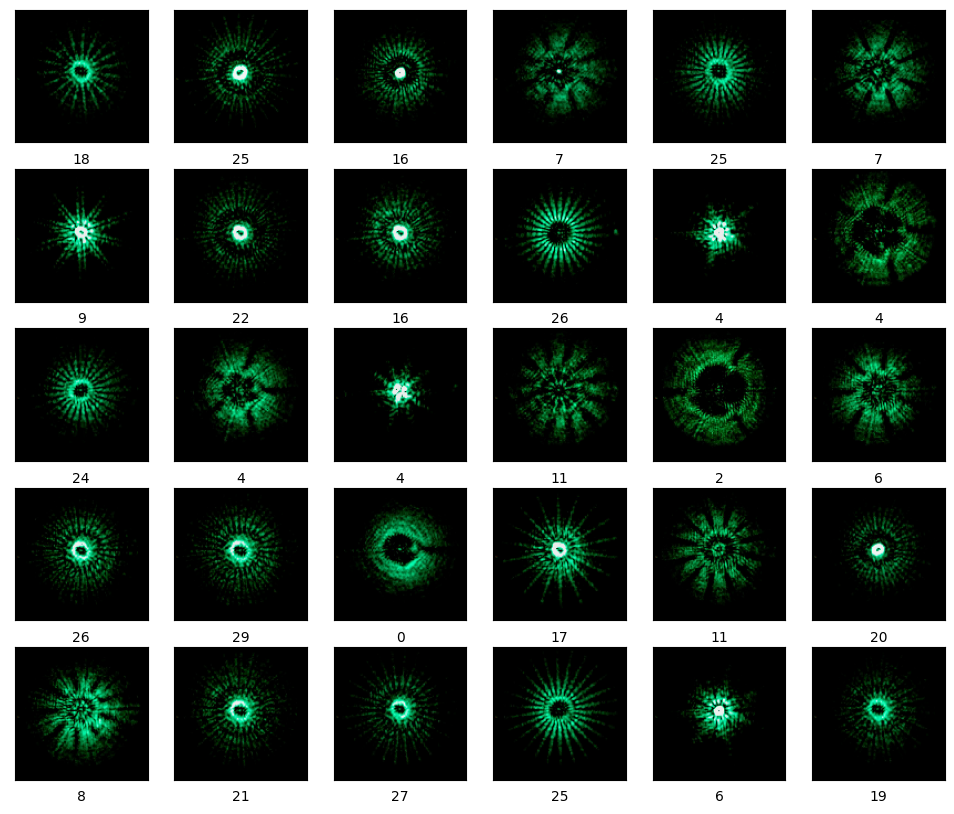

In [27]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i], cmap=plt.cm.hot)
    plt.xlabel(labels_train[i])


### Далее при обучении модели воспроизводим статью https://habr.com/ru/post/426797/

In [28]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### **Строим модель**

In [203]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(120, 120, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.softmax)
])

### **Компилируем модель**

In [194]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [195]:
history = model.fit(data_train, labels_train, validation_split=0.33, epochs=25)

Epoch 1/25
46/46 [==============================] - 5s 80ms/step - loss: 3.3970 - accuracy: 0.1042 - val_loss: 3.1758 - val_accuracy: 0.1363
Epoch 2/25
46/46 [==============================] - 4s 85ms/step - loss: 2.7559 - accuracy: 0.2536 - val_loss: 2.8673 - val_accuracy: 0.2211
Epoch 3/25
46/46 [==============================] - 2s 49ms/step - loss: 2.2629 - accuracy: 0.4154 - val_loss: 2.5595 - val_accuracy: 0.3102
Epoch 4/25
46/46 [==============================] - 4s 77ms/step - loss: 1.8274 - accuracy: 0.5497 - val_loss: 2.3828 - val_accuracy: 0.3394
Epoch 5/25
46/46 [==============================] - 4s 87ms/step - loss: 1.4845 - accuracy: 0.6600 - val_loss: 2.0819 - val_accuracy: 0.4117
Epoch 6/25
46/46 [==============================] - 2s 51ms/step - loss: 1.1953 - accuracy: 0.7491 - val_loss: 1.9310 - val_accuracy: 0.4590
Epoch 7/25
46/46 [==============================] - 3s 59ms/step - loss: 0.9768 - accuracy: 0.8143 - val_loss: 1.7971 - val_accuracy: 0.5104
Epoch 8/25
46

In [200]:
history.history

{'loss': [3.3969900608062744,
  2.755920171737671,
  2.2629382610321045,
  1.8274145126342773,
  1.484505295753479,
  1.1952972412109375,
  0.9767733216285706,
  0.7831185460090637,
  0.6289793848991394,
  0.518695056438446,
  0.43452897667884827,
  0.34197646379470825,
  0.2827363610267639,
  0.2303827553987503,
  0.19281229376792908,
  0.16468726098537445,
  0.13570596277713776,
  0.11327087879180908,
  0.0977809801697731,
  0.08445986360311508,
  0.07218616455793381,
  0.06342224776744843,
  0.05499415099620819,
  0.0488731786608696,
  0.0435137115418911],
 'accuracy': [0.1041809469461441,
  0.2535983622074127,
  0.4153529703617096,
  0.5496915578842163,
  0.6600411534309387,
  0.7491432428359985,
  0.8142563104629517,
  0.8649759888648987,
  0.9054146409034729,
  0.9259766936302185,
  0.9437971115112305,
  0.9691569805145264,
  0.97806715965271,
  0.9876627922058105,
  0.9931460022926331,
  0.9945167899131775,
  0.9993146061897278,
  0.9993146061897278,
  0.9993146061897278,
  1.0,

In [196]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

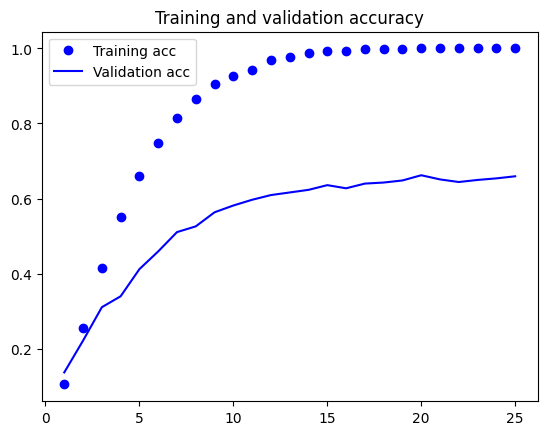

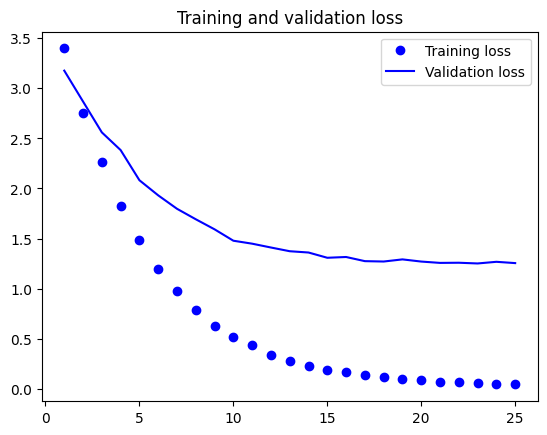

In [197]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [198]:
test_loss, test_acc = model.evaluate(data_test, labels_test)
print('Test accuracy:', test_acc)

18/18 [==============================] - 0s 21ms/step - loss: 1.2274 - accuracy: 0.6477
Test accuracy: 0.6477064490318298


### CNN

In [204]:
model_pool = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=data_train[1:], activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25)
    keras.layers.Flatten(input_shape=(120, 120, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [205]:
model_pool.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [206]:
history = model_pool.fit(data_train, labels_train, validation_split=0.33, epochs=25)

Epoch 1/25
46/46 [==============================] - 5s 77ms/step - loss: 3.3487 - accuracy: 0.0699 - val_loss: 3.2061 - val_accuracy: 0.0960
Epoch 2/25
46/46 [==============================] - 5s 99ms/step - loss: 2.9480 - accuracy: 0.1967 - val_loss: 3.0099 - val_accuracy: 0.1502
Epoch 3/25
46/46 [==============================] - 5s 107ms/step - loss: 2.6046 - accuracy: 0.3084 - val_loss: 2.7728 - val_accuracy: 0.2378
Epoch 4/25
46/46 [==============================] - 5s 106ms/step - loss: 2.2650 - accuracy: 0.4304 - val_loss: 2.5007 - val_accuracy: 0.3185
Epoch 5/25
46/46 [==============================] - 3s 72ms/step - loss: 1.9374 - accuracy: 0.5826 - val_loss: 2.2888 - val_accuracy: 0.3825
Epoch 6/25
46/46 [==============================] - 4s 80ms/step - loss: 1.6548 - accuracy: 0.6402 - val_loss: 2.0934 - val_accuracy: 0.4256
Epoch 7/25
46/46 [==============================] - 5s 101ms/step - loss: 1.4078 - accuracy: 0.7231 - val_loss: 1.8893 - val_accuracy: 0.5035
Epoch 8/25

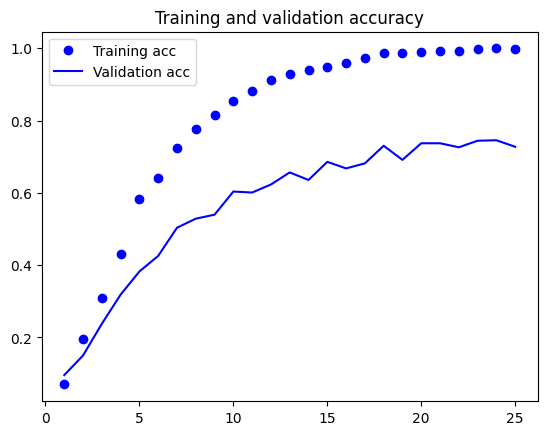

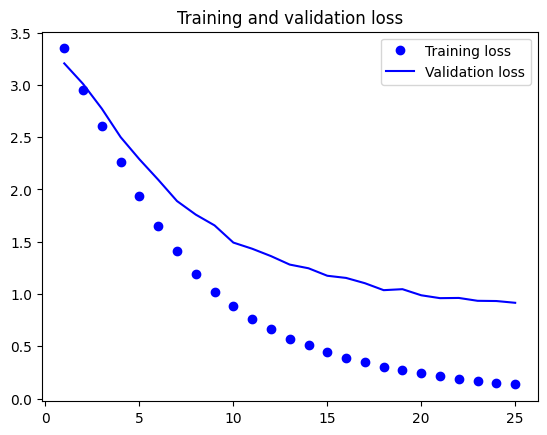

In [207]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### **Вывод: Среднее значение accuracy (точности) на обучающей и тестовой выборке - 0,64.

In [29]:
data_train.shape

(2178, 120, 120, 3)

In [48]:
model_pool2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=data_train.shape[1:], activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.20),
    keras.layers.Flatten(input_shape=(120, 120, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [49]:
model_pool2.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# без регуляризации и с дропаутом 0.25
history = model_pool2.fit(data_train, labels_train, validation_split=0.33, epochs=11)

Epoch 1/25
46/46 [==============================] - 44s 942ms/step - loss: 3.4041 - accuracy: 0.0747 - val_loss: 3.2119 - val_accuracy: 0.0946
Epoch 2/25
46/46 [==============================] - 39s 846ms/step - loss: 2.8998 - accuracy: 0.1830 - val_loss: 2.6671 - val_accuracy: 0.2865
Epoch 3/25
46/46 [==============================] - 41s 887ms/step - loss: 2.1557 - accuracy: 0.3893 - val_loss: 1.9360 - val_accuracy: 0.5396
Epoch 4/25
46/46 [==============================] - 34s 737ms/step - loss: 1.4387 - accuracy: 0.6141 - val_loss: 1.4904 - val_accuracy: 0.6287
Epoch 5/25
46/46 [==============================] - 34s 730ms/step - loss: 1.0029 - accuracy: 0.7286 - val_loss: 1.0891 - val_accuracy: 0.7385
Epoch 6/25
46/46 [==============================] - 33s 713ms/step - loss: 0.6830 - accuracy: 0.8211 - val_loss: 0.9769 - val_accuracy: 0.7288
Epoch 7/25
46/46 [==============================] - 36s 771ms/step - loss: 0.5437 - accuracy: 0.8602 - val_loss: 0.8472 - val_accuracy: 0.7789

KeyboardInterrupt: 

In [47]:
# с регуляризацией и с дропаутом 0.20
history = model_pool2.fit(data_train, labels_train, validation_split=0.33, epochs=20)

Epoch 1/20
46/46 [==============================] - 31s 657ms/step - loss: 90.1619 - accuracy: 0.0473 - val_loss: 27.8715 - val_accuracy: 0.0445
Epoch 2/20
46/46 [==============================] - 30s 663ms/step - loss: 24.8347 - accuracy: 0.0446 - val_loss: 22.8062 - val_accuracy: 0.0320
Epoch 3/20
46/46 [==============================] - 33s 709ms/step - loss: 22.5523 - accuracy: 0.0439 - val_loss: 22.0452 - val_accuracy: 0.0320
Epoch 4/20
46/46 [==============================] - 39s 849ms/step - loss: 21.7607 - accuracy: 0.0384 - val_loss: 21.4961 - val_accuracy: 0.0320
Epoch 5/20
46/46 [==============================] - 35s 765ms/step - loss: 21.4227 - accuracy: 0.0480 - val_loss: 21.7938 - val_accuracy: 0.0320
Epoch 6/20
46/46 [==============================] - 35s 772ms/step - loss: 21.4179 - accuracy: 0.0480 - val_loss: 21.3019 - val_accuracy: 0.0320
Epoch 7/20
46/46 [==============================] - 43s 943ms/step - loss: 21.3991 - accuracy: 0.0480 - val_loss: 21.6508 - val_ac

KeyboardInterrupt: 

In [50]:
# без регуляризации и с дропаутом 0.20
history = model_pool2.fit(data_train, labels_train, validation_split=0.33, epochs=20)

Epoch 1/20
46/46 [==============================] - 30s 628ms/step - loss: 3.4379 - accuracy: 0.0562 - val_loss: 3.2957 - val_accuracy: 0.0946
Epoch 2/20
46/46 [==============================] - 32s 694ms/step - loss: 3.1110 - accuracy: 0.1275 - val_loss: 3.0521 - val_accuracy: 0.1210
Epoch 3/20
46/46 [==============================] - 38s 837ms/step - loss: 2.6611 - accuracy: 0.2502 - val_loss: 2.5659 - val_accuracy: 0.2907
Epoch 4/20
46/46 [==============================] - 34s 742ms/step - loss: 2.0528 - accuracy: 0.4229 - val_loss: 1.9752 - val_accuracy: 0.4784
Epoch 5/20
46/46 [==============================] - 42s 915ms/step - loss: 1.5241 - accuracy: 0.5785 - val_loss: 1.5718 - val_accuracy: 0.6008
Epoch 6/20
46/46 [==============================] - 62s 1s/step - loss: 1.1438 - accuracy: 0.6833 - val_loss: 1.2534 - val_accuracy: 0.7079
Epoch 7/20
46/46 [==============================] - 41s 903ms/step - loss: 0.8381 - accuracy: 0.7724 - val_loss: 1.0487 - val_accuracy: 0.7288
Ep

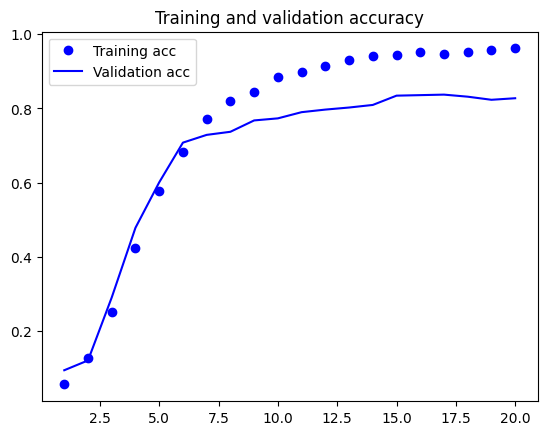

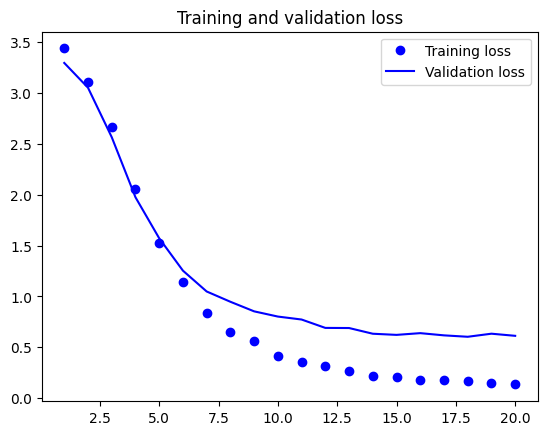

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
test_loss, test_acc = model_pool2.evaluate(data_test, labels_test)
print('Test accuracy:', test_acc)

18/18 [==============================] - 2s 113ms/step - loss: 0.5548 - accuracy: 0.8477
Test accuracy: 0.8477064371109009


### Прогнозирование



In [ ]:
predictions = model.predict(data_test)

In [ ]:
np.argmax(predictions[0])

Напишем функции для визуализации предсказаний

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.hot)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("pred={}, prob={:2.0f}%, (real={})".format(class_names[predicted_label],
                              100*np.max(predictions_array),
                              class_names[true_label]),
                              color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, labels_test, data_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  labels_test)

### Посмотрим на результат предсказаний:

In [ ]:
num_rows = 5
num_cols = 3
start_index = 50 # Начиная с этого индекса смотрим на картинки
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i + start_index, predictions, labels_test, data_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i + start_index, predictions,  labels_test)